<a href="https://colab.research.google.com/github/alienigena264/MetNumUN2024I/blob/main/Lab/Lab2/jgarciaot_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U fortran-magic

In [ ]:
%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00',
                             '2017-01-07 00:00:00+00:00',
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

The fortranmagic extension is already loaded. To reload it, use:
  %reload_ext fortranmagic


<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/me.jpg" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [ ]:
assert ran_the_first_cell, "Oh noes!"

In [ ]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [ ]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [ ]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [ ]:
# Lists can also be sliced, which makes a copy of elements between
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [ ]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [ ]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [ ]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [ ]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [ ]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [ ]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [ ]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}

In [ ]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'David': 'Hume',
 'Immanuel': 'Kant',
 'Bertrand': 'Russell',
 'Ludwig': 'Wittgenstein'}

In [ ]:
del philosophers['David']
philosophers

{'Immanuel': 'Kant', 'Bertrand': 'Russell', 'Ludwig': 'Wittgenstein'}

In [ ]:
# No slicing.
philosophers['Bertrand':'Immanuel']

TypeError: ignored

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pacino.gif" alt="Drawing" style="width: 100%;"/></center>


In [ ]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/gross.gif" alt="Drawing" style="width: 50%;"/></center>


In [ ]:
%%time

matmul(a, b)

CPU times: user 40 µs, sys: 0 ns, total: 40 µs
Wall time: 44.3 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

**My own example 0 - cpu info**

In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
addres

**My own example 1 - Changing in matmul(A, B) Python len(B) (# of rows of B) for len(A[0]) (# of columns of A)**

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    """Multiplico filas de A"""
    rows_out = len(A)
    """Por columnas de B"""
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(A[0])):
                out[i][j] += A[i][k] * B[k][j]
    return out

**My own example 2 - Verifiying error with in matmul(A, B) Python with the original matrices when changing len(B) (# of rows of B) for len(A[0]) (# of colums of A)**

In [ ]:
%%time
#matmul(a, b) ##the number of columns of matrix 'a' is not equal to the number of rows of matrix 'b'.

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 8.58 µs


**My own example 3 - Chekcing the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [ ]:
def matmul(A,B):
    if len(A[0]) == len(B):
      out = [[0 for col in range(len(B[0]))] for row in range(len(A))]
      for i in range(len(A)):
          for j in range(len(B[0])):
              for k in range(len(A[0])):
                  out[i][j] += A[i][k] * B[k][j]
      return out
    else:
        return ("No se pueden multiplicar las matrices.")

**My own example 4 -  Verifiying error with in matmul(A, B) Python when checking the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [ ]:
%%time
matmul(a, b)

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 9.54 µs


'The matrices cannot be multiplied.'

**My own example 5 - Deifining A and B that are compatible for multiplcation**

In [ ]:
A = [[14, 15, 16, 17],
[18, 19, 20, 21],
[22, 23, 24, 25],
[26, 27, 28, 29]]

B = [[5, 9, 12, 3],
[1, 8, 6, 11],
[0, 2, 7, 4],
[10, 15, 14, 13]]

**My own example 6 - Runinng the correct Python matrix multiplication code with the matrices with dimensions compatible for multiplication.**

In [ ]:
%%time
matmul(A, B)

CPU times: user 41 µs, sys: 3 µs, total: 44 µs
Wall time: 47.9 µs


[[255, 533, 608, 492],
 [319, 669, 764, 616],
 [383, 805, 920, 740],
 [447, 941, 1076, 864]]

In [ ]:
import random

In [ ]:
random.normalvariate(0,1)

0.9421630584334276

In [ ]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.5495510660539662, 0.8370569381334291, 0.8693255158732399],
 [0.024615759583305308, 0.5460783265265026, 0.9043316626941289]]

**My own example 7 - Running 10 times matmul(randa, randb) with randa and randb a randon matrices of 600 x 100 and 100 x 600 and calulating the average execution time**

In [ ]:
%%time
matrixa1 = random_matrix(600, 100)
matrixb2 = random_matrix(100, 600)
result = matmul(matrixa1, matrixb2)

CPU times: user 6.88 s, sys: 24 ms, total: 6.91 s
Wall time: 6.98 s


In [ ]:
import time
run = 10
avg = 0
for i in range(run):
  start = time.process_time()
  result = matmul(matrixa1, matrixb2)
  end = time.process_time()
  print(end - start)
  avg += end - start
print(avg/10)

5.835494670999999
6.742958486000003
7.762242445999998
6.393758636999998
7.151355878000004
5.934164717999998
7.036620685000003
8.791439517
5.904870941000013
6.816711631999993
6.836961761100001


**My own example 8 - Creating the average execution time data frame and adding Python's average execution time**

In [ ]:
com_time_ex = {'Language': ['Pyhton'], 'Average Secs': [avg/10]}
DF_com_time_ex = pd.DataFrame(com_time_ex)
display(DF_com_time_ex)

NameError: name 'avg' is not defined

**My own example 9 - Running 10 times randa and randb mutiplicaction as NumPy arrays  adding NumPy's average execution time**

In [ ]:
import time

matrix_1 = np.array(matrixa1)
matrix_2 = np.array(matrixb2)
avg = 0
for i in range(10):
  start = time.process_time()
  matrix3 = matrix_1@matrix_2
  end = time.process_time()
  avg += end - start
print("The average execution time is: ", avg/10)

The average execution time is:  0.006271854499998142


In [ ]:
DF_com_time_ex.loc[len(DF_com_time_ex.index)] = ['Numpy', avg/10]
display(DF_com_time_ex)

,Language,Average Secs
0,Pyhton,9.167493
1,Numpy,0.006272


In [ ]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)

CPU times: user 9.52 s, sys: 30.9 ms, total: 9.55 s
Wall time: 9.64 s


In [ ]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [ ]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result

    result = sum(xs * ys)
end

In [ ]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [ ]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 13.3 ms, sys: 0 ns, total: 13.3 ms
Wall time: 16.4 ms


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 186 µs, sys: 2 µs, total: 188 µs
Wall time: 197 µs


333328333350000.0

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/sloth.gif" alt="Drawing" style="width: 1080px;"/></center>


**My own example 10 - Deifining A (2x2)  and B (2x2)**

In [ ]:
A = [[1, 2],
     [3, 4]]

B = [[5, 6],
     [7, 8]]

**My own example 11 - Defining Fortran subroutine matmul(A,B) for 2x2 matrices**

In [ ]:
%%fortran
subroutine fortran_matrix(A,B)
    real, dimension(2,2) :: A,B,result
    result = matmul(A, B)
end subroutine fortran_matrix

**My own example 12 -Run Fortran subroutine matmul(A,B) with a and b 2x2 matrices**

In [ ]:
%%time
fortran_matrix(A, B)

CPU times: user 32 µs, sys: 0 ns, total: 32 µs
Wall time: 36.5 µs


**My own example 13 - Defining Fortran subroutine matmul(A,B) for 600x100 and 100x600 matrices**

In [ ]:
%%fortran
subroutine fortran_matrix(A,B)
    real, dimension(600,100) :: A
    real, dimension(100,600) :: B
    real, dimension(600,600) :: out
    out = matmul(A, B)
end subroutine fortran_matrix

**My own example 14 -Run Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices**

In [ ]:
%%time
fortran_matrix(matrixa1, matrixb2)

CPU times: user 11.2 ms, sys: 985 µs, total: 12.2 ms
Wall time: 16.9 ms


**My own example 15 - Running 10 times the  Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices and adding Fortran magic average execution time to the data frame**

In [ ]:
import time
avg = 0
for i in range(10):
  start = time.process_time()
  fortran_matrix(matrixa1,matrixb2)
  end = time.process_time()
  avg += end - start
avg = avg/10
print("The average execution time is: ", avg)

DF_com_time_ex.loc[len(DF_com_time_ex.index)] = ['FortranMagic', avg]
display(DF_com_time_ex)

The average execution time is:  0.010104348700001254


,Language,Average Secs
0,Pyhton,9.167493
1,Numpy,0.006272
2,FortranMagic,0.010104


**My own example 16 - Creating a  Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile test.f
        program TEST

          integer ::  g = 600
          integer ::  m = 100
          integer ::  p = 600

          real    :: T,inicio,final

          integer ::  r, i, j, k

          double precision, dimension (600,100) :: A
          double precision, dimension (100,600) :: B
          double precision, dimension (600,600) :: C

          do i = 1, g
              do j = 1, g
                A(i, j) = i+j * 0.1
              end do
          end do

          do i = 1, m
              do j = 1, p
                B(i, j) = i+j * 0.5
              end do
          end do

          T = 0.0

          do r = 1, 10

            call cpu_time(inicio)
            C = matmul(A, B)
            call cpu_time(final)
            T = T + (final-inicio)

          end do

          T = T/10.0

        PRINT *,T
        stop
        end

Writing test.f


**My own example 17 - Running the Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!gfortran test.f  -o test
!./test

   5.31390030E-03


**My own example 18 - Adding Fortran average execution time to the data frame**

In [ ]:
DF_com_time_ex.loc[len(DF_com_time_ex.index)] = ['Fortran', 0.000531439949]
display(DF_com_time_ex)

,Language,Average Secs
0,Pyhton,9.167493
1,Numpy,0.006272
2,FortranMagic,0.010104
3,Fortran,0.000531


**My own example 19 - Creating a c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile temp.c

#include <stdio.h>
#include <stdlib.h>
#include <time.h>

int main() {
int count=10;
FILE *archivo;
  int A[600][100];
  // Rellenar la matriz
  for(int i = 0; i < 600; i++) {
    for(int j = 0; j < 100; j++) {
      A[i][j] = count+i+j;
    }
  }
  int B[100][600];
  // Rellenar la matriz
  for(int i = 0; i <100; i++) {
    for(int j = 0; j < 600; j++) {
      B[i][j] = count+i+j;
    }
  }
  int Resultado[600][600];
    clock_t inicio,stop;
    double total=0.0;

    for(int repeticion=0; repeticion<10; repeticion++){
        inicio= clock();
        for(int i = 0; i < 600; i++) {
            //printf("%d ", i);
            for(int j = 0; j < 600; j++) {
                //printf("%d ", j);
                Resultado[i][j]=0;
                for(int k = 0; k < 100; k++) {
                    Resultado[i][j] += A[i][k] * B[k][j];
                    //printf("%d ", k);
                    }
                }
            }
            stop=clock();
        total+= (double) (stop - inicio)/CLOCKS_PER_SEC;
        }
        total= total/10;
        printf("%f ", total);
    archivo = fopen("resultado.txt", "w+");
    fprintf(archivo,"%f",total);
    fclose(archivo);

}

Writing temp.c


**My own example 20 - Running the c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!gcc temp.c -o temp
!./temp

0.182049 

**My own example 21 - Adding c average execution time to the data frame**

In [ ]:
C = open("resultado.txt",'r')
avr_archivo = float(C.readline())
DF_com_time_ex.loc[len(DF_com_time_ex.index)] = ['C', avr_archivo]
display(DF_com_time_ex)

,Language,Average Secs
0,Pyhton,9.167493
1,Numpy,0.006272
2,FortranMagic,0.010104
3,Fortran,0.000531
4,C,0.182049


**My own example 22 - Creating a C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile temp++.cc
#include <iostream>
#include <ctime>
using namespace std;
int main() {
int count=10;
FILE *archivo;
  int A[600][100];
  // Rellenar la matriz
  for(int i = 0; i < 600; i++) {
    for(int j = 0; j < 100; j++) {
      A[i][j] = count+i+j;
    }
  }
  int B[100][600];
  // Rellenar la matriz
  for(int i = 0; i <100; i++) {
    for(int j = 0; j < 600; j++) {
      B[i][j] = count+i+j;
    }
  }
  int Resultado[600][600];
    unsigned inicio,stop;
    double total=0.0;
    int repeticion =0;
    for(int repeticion=0; repeticion<10; repeticion++){
        inicio= clock();
        for(int i = 0; i < 600; i++) {
            //printf("%d ", i);
            for(int j = 0; j < 600; j++) {
                //printf("%d ", j);
                Resultado[i][j]=0;
                for(int k = 0; k < 100; k++) {
                    Resultado[i][j] += A[i][k] * B[k][j];
                    //printf("%d ", k);
                    }
                }
            }
            stop=clock();
        total+= double (stop - inicio)/CLOCKS_PER_SEC;
        }
        total= total/10;
        cout << total << endl;
    archivo = fopen("cppresultado.txt", "w+");
    fprintf(archivo,"%f",total);
    fclose(archivo);
  return 0 ;
}

Overwriting temp++.cc


**My own example 23 - Running the C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!g++ temp++.cc -o temp++
!./temp++

0.162193


**My own example 24 - Adding C++ average execution time to the data frame**

In [ ]:
C_plus_plus = open("cppresultado.txt",'r')
avr_archivo = float(C_plus_plus.readline())
DF_com_time_ex.loc[len(DF_com_time_ex.index)] = ['C++', avr_archivo]
display(DF_com_time_ex)

,Language,Average Secs
0,Pyhton,9.167493
1,Numpy,0.006272
2,FortranMagic,0.010104
3,Fortran,0.000531
4,C,0.182049
5,C++,0.162193


**My own example 25 - Creating a Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile Main.java
import java.util.Arrays;
import java.util.Random;
class Main {

  public static void main(String[] args) {
    try{
      int[][] A=randomMatrix(600,100);
      int[][] B=randomMatrix(100,600);
      long timei = System.nanoTime();
      for(int i=0;i<10;i++){
        mulmat(A,B);
      }
      long timef = System.nanoTime();
      System.out.println("Average time in nanoSec: "+((timef - timei)/10));
    }catch(Exception e){
      System.out.println(e);
    }

  }
  public static int[][] randomMatrix(int x,int y){
    Random r=new Random();
    int[][] a=new int[x][y];
    for(int i=0;i<x;i++)
    {
        for(int j=0;j<y;j++)
        {
          a[i][j]=r.nextInt(20);
        }
    }
    return a;
  }
  public static void imp(int[][] matriz){
    for (int x=0; x < matriz.length; x++) {
  System.out.print("|");
  for (int y=0; y < matriz[x].length; y++) {
    System.out.print (matriz[x][y]);
    if (y!=matriz[x].length-1) System.out.print("\t");
  }
  System.out.println("|");
}
System.out.println("");
  }
  public static int[][] mulmat(int[][]A,int[][]B) throws Exception{
    int [] [] matrix = new int [A.length] [B[0].length];
    if(A[0].length==B.length){
      for(int i=0;i<A.length;i++){
        for(int j=0;j<B[0].length;j++){
          for(int k=0;k<B.length;k++){
            matrix[i][j]+=A[i][k]*B[k][j];
          }
        }
      }
    }else{
      throw new Exception("Number of columns of first matrix don't match with number of rows of second matrix");
    }
    return matrix;
  }
}

Writing Main.java


**My own example 26 - Running the Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!javac Main.java
!java Main

Average time in nanoSec: 66187728


**My own example 27 - Adding Java average execution time to the data frame**

In [ ]:
import subprocess

subprocess.run(["javac", "Matmul.java"])

result = subprocess.run(["java", "Matmul"], capture_output=True, text=True)

average_time_java = result.stdout.strip()

# Print the average time
print("Average Time in Java:", average_time_java)

Average Time in Java: 


**My own example 28 - Creating a Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%javascript
// Inicializar las matrices A y B
let A = [];
let B = [];
for (let i = 0; i < 100; i++) {
  A[i] = [];
  for (let j = 0; j < 600; j++) {
    A[i][j] = Math.random(); // llenar con valores aleatorios
  }
}
for (let i = 0; i < 600; i++) {
  B[i] = [];
  for (let j = 0; j < 100; j++) {
    B[i][j] = Math.random(); // llenar con valores aleatorios
  }
}

// Realizar la multiplicación de matrices 10 veces y medir el tiempo de ejecución
let tiempos = [];
for (let k = 0; k < 10; k++) {
  let inicio = performance.now();
  let C = [];
  for (let i = 0; i < 100; i++) {
    C[i] = [];
    for (let j = 0; j < 100; j++) {
      let sum = 0;
      for (let k = 0; k < 600; k++) {
        sum += A[i][k] * B[k][j];
      }
      C[i][j] = sum;
    }
  }
  let fin = performance.now();
  tiempos.push(fin - inicio);
}

// Calcular el promedio del tiempo de ejecución
let promedioTiempo = tiempos.reduce((a, b) => a + b) / tiempos.length;

// Imprimir el promedio del tiempo de ejecución en la consola
console.log(promedioTiempo);

<IPython.core.display.Javascript object>

**My own example 29 - Running the Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%javascript
// Inicializar las matrices A y B
let A = [];
let B = [];
for (let i = 0; i < 100; i++) {
  A[i] = [];
  for (let j = 0; j < 600; j++) {
    A[i][j] = Math.random(); // llenar con valores aleatorios
  }
}
for (let i = 0; i < 600; i++) {
  B[i] = [];
  for (let j = 0; j < 100; j++) {
    B[i][j] = Math.random(); // llenar con valores aleatorios
  }
}

// Realizar la multiplicación de matrices 10 veces y medir el tiempo de ejecución
let tiempos = [];
for (let k = 0; k < 10; k++) {
  let inicio = performance.now();
  let C = [];
  for (let i = 0; i < 100; i++) {
    C[i] = [];
    for (let j = 0; j < 100; j++) {
      let sum = 0;
      for (let k = 0; k < 600; k++) {
        sum += A[i][k] * B[k][j];
      }
      C[i][j] = sum;
    }
  }
  let fin = performance.now();
  tiempos.push(fin - inicio);
}

// Calcular el promedio del tiempo de ejecución
let promedioTiempo = tiempos.reduce((a, b) => a + b) / tiempos.length;

// Imprimir el promedio del tiempo de ejecución en la consola
console.log(promedioTiempo);

<IPython.core.display.Javascript object>

**My own example 30 - Adding Javascript average execution time to the data frame**

In [ ]:
avg=0.0105

DF_com_time_ex.loc[len(DF_com_time_ex.index)] = ['Javascript', avg]
display(DF_com_time_ex)

,Language,Average Secs
0,Pyhton,9.167493
1,Numpy,0.006272
2,FortranMagic,0.010104
3,Fortran,0.000531
4,C,0.182049
5,C++,0.162193
6,Javascript,0.010500


**My own example 31 - Finding the minimun average esecuiton time in the data frame**

In [ ]:
sorted_df = DF_com_time_ex.sort_values(by='Average Secs')
min_time = sorted_df.iloc[0]['Average Secs']

print("El tiempo mínimo promedio de ejecución es:", min_time)

El tiempo mínimo promedio de ejecución es: 0.000531439949


**My own example 32 - Adding the Speed factor columne to the data frame**

In [ ]:
DF_com_time_ex['Average Secs'] = DF_com_time_ex['Average Secs'].apply(lambda x: float(x))

minTime=DF_com_time_ex['Average Secs'].min()

DF_com_time_ex['Speed Factor']=(DF_com_time_ex['Average Secs']/minTime)

DF_com_time_ex

,Language,Average Secs,Speed Factor
0,Pyhton,9.167493,17250.290201
1,Numpy,0.006272,11.801624
2,FortranMagic,0.010104,19.013152
3,Fortran,0.000531,1.000000
4,C,0.182049,342.557989
5,C++,0.162193,305.195348
6,Javascript,0.010500,19.757642


**My own example 33 - Sorting the the data frame by average execution time**

In [ ]:
sorted_df = DF_com_time_ex.sort_values(by='Average Secs')
sorted_df

,Language,Average Secs,Speed Factor
3,Fortran,0.000531,1.000000
1,Numpy,0.006272,11.801624
2,FortranMagic,0.010104,19.013152
6,Javascript,0.010500,19.757642
5,C++,0.162193,305.195348
4,C,0.182049,342.557989
0,Pyhton,9.167493,17250.290201


## Why is the Python Version so Much Slower?

In [ ]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

In [ ]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/runaway.gif" alt="Drawing" style="width: 50%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/thisisfine.gif" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [ ]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

In [ ]:
data + data

array([2, 4, 6, 8])

In [ ]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 307 µs, sys: 997 µs, total: 1.3 ms
Wall time: 1.01 ms


333328333350000.0

In [ ]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 0 ns, sys: 3.29 ms, total: 3.29 ms
Wall time: 5.4 ms


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 177 µs, sys: 0 ns, total: 177 µs
Wall time: 181 µs


333328333350000.0

In [ ]:
# Numpy won't allow us to write a string into an int array.
data[0] = "foo"

ValueError: ignored

In [ ]:
# We also can't grow an array once it's created.
data.append(3)

AttributeError: ignored

In [ ]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

array([[1, 2],
       [3, 4]])

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [ ]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[1 2 3]
 [4 5 6]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00'


# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [ ]:
data = np.arange(15).reshape(3, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [ ]:
# Binary operators.
data * data

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196]])

In [ ]:
# Unary functions.
np.sqrt(data)

array([[0.        , 1.        , 1.41421356, 1.73205081, 2.        ],
       [2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ],
       [3.16227766, 3.31662479, 3.46410162, 3.60555128, 3.74165739]])

In [ ]:
# Comparison operations
(data % 3) == 0

array([[ True, False, False,  True, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False]])

In [ ]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False]])

In [ ]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [ ]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

array([0.        , 0.34185385, 0.64251645, 0.86575984, 0.98468459,
       0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [ ]:
# Slicing works with the same semantics as Python lists.
sines[0]

0.0

In [ ]:
sines[:3]  # First three elements

array([0.        , 0.34185385, 0.64251645])

In [ ]:
sines[5:]  # Elements from 5 on.

array([0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [ ]:
sines[::2]  # Every other element.

array([0.        , 0.64251645, 0.98468459, 0.8665558 , 0.34335012])

In [ ]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

sines:
 [0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]
sines > 0.5:
 [False False  True  True  True  True  True  True False False]
sines[sines > 0.5]:
 [0.64251645 0.86575984 0.98468459 0.98496101 0.8665558  0.64373604]


In [ ]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

[0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]


array([0.        , 0.98468459, 0.64373604])

In [ ]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [ ]:
sort_indices = np.argsort(unsorted_data)
sort_indices

array([4, 0, 2, 6, 1, 5, 3])

In [ ]:
unsorted_data[sort_indices]

array([-1,  1,  2,  2,  3,  5, 12])

In [ ]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [ ]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

array(['D', 'B', 'E', 'C', 'A'], dtype='<U1')

In [ ]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31',
       '2017-02-01'], dtype='datetime64[D]')


In [ ]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


On multi-dimensional arrays, we can slice along each axis independently.

In [ ]:
data = np.arange(25).reshape(5, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [ ]:
data[:2, :2]  # First two rows and first two columns.

array([[0, 1],
       [5, 6]])

In [ ]:
data[:2, [0, -1]]  # First two rows, first and last columns.

array([[0, 4],
       [5, 9]])

In [ ]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [ ]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [ ]:
variance(np.random.standard_normal(1000))

0.9767747797652677

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [ ]:
data = np.arange(30)
data.mean()

14.5

- ...but we can do more interesting things with multi-dimensional arrays.

In [ ]:
data = np.arange(30).reshape(3, 10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

In [ ]:
data.mean()

14.5

In [ ]:
data.mean(axis=0)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

In [ ]:
data.mean(axis=1)

array([ 4.5, 14.5, 24.5])

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [ ]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

Row:
[1 2 3 4]
Column:
[[1]
 [2]
 [3]]


In [ ]:
row + column

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7]])

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [ ]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]
Mean:
[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
Data - Mean:
[[-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]]


# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/unicorn.jpg" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/panda-wrangling.gif" alt="Drawing" style="width: 75%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pandas_logo.png" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for:
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [ ]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [ ]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [1 2 3 4 5]


In [ ]:
# We can look up values out of a Series by position...
s.iloc[0]

1

In [ ]:
# ... or by label.
s.loc['a']

1

In [ ]:
# Slicing works as expected...
s.iloc[:2]

a    1
b    2
dtype: int64

In [ ]:
# ...but it works with labels too!
s.loc[:'c']

a    1
b    2
c    3
dtype: int64

In [ ]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

a    1
e    5
dtype: int64

In [ ]:
# As does boolean masking.
s.loc[s > 2]

c    3
d    4
e    5
dtype: int64

In [ ]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

a    10.0
c    20.0
d    30.0
z    40.0
dtype: float64

In [ ]:
s + other_s

a    11.0
b     NaN
c    23.0
d    34.0
e     NaN
z     NaN
dtype: float64

In [ ]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

a    11.0
b     0.0
c    23.0
d    34.0
e     0.0
z     0.0
dtype: float64

In [ ]:
!pip install yfinance
import yfinance as yf

In [ ]:
# Most real datasets are read in from an external file format.
# aapl = pd.read_csv('AAPL', parse_dates=['Date'], index_col='Date')

aapl = yf.download("AAPL", start = "2013-01-01" , end ="2013-12-01")
aapl.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,19.779285,19.821428,19.343929,19.608213,16.791183,560518000
2013-01-03,19.567142,19.631071,19.321428,19.360714,16.579241,352965200
2013-01-04,19.177500,19.236786,18.779642,18.821428,16.117437,594333600
2013-01-07,18.642857,18.903570,18.400000,18.710714,16.022629,484156400
2013-01-08,18.900356,18.996071,18.616072,18.761070,16.065744,458707200


In [ ]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

,Open,High
Date,,
2013-01-02,19.779285,19.821428
2013-01-03,19.567142,19.631071


In [ ]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

,Close,Volume
Date,,


# Rolling Operations

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/rolling.gif" alt="Drawing" style="width: 75%;"/></center>

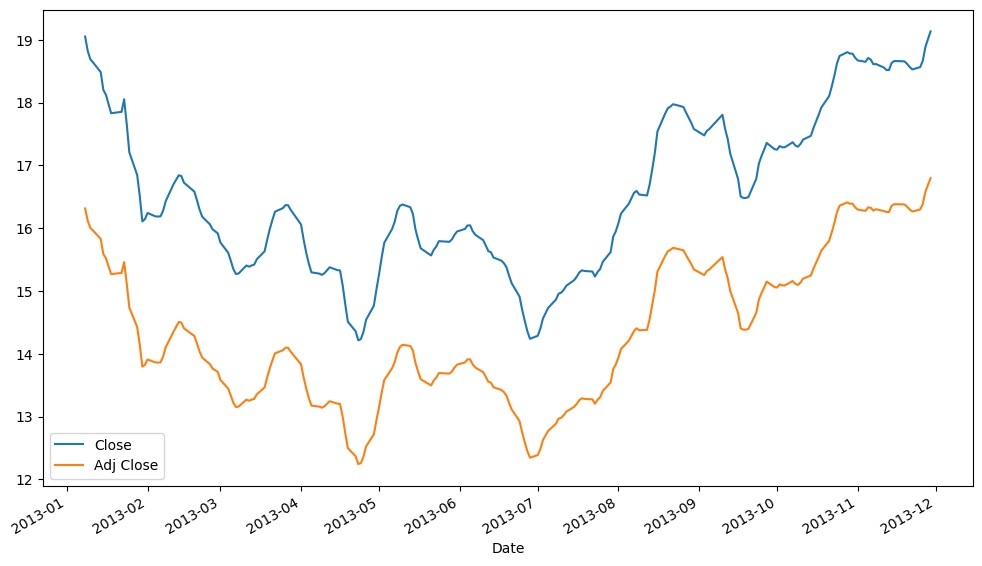

In [ ]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

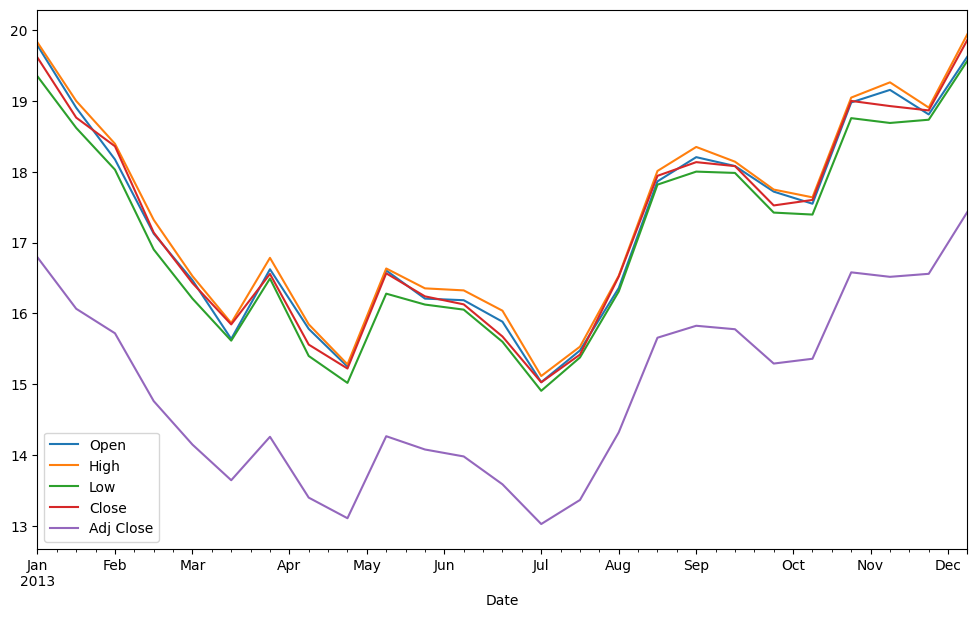

In [ ]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

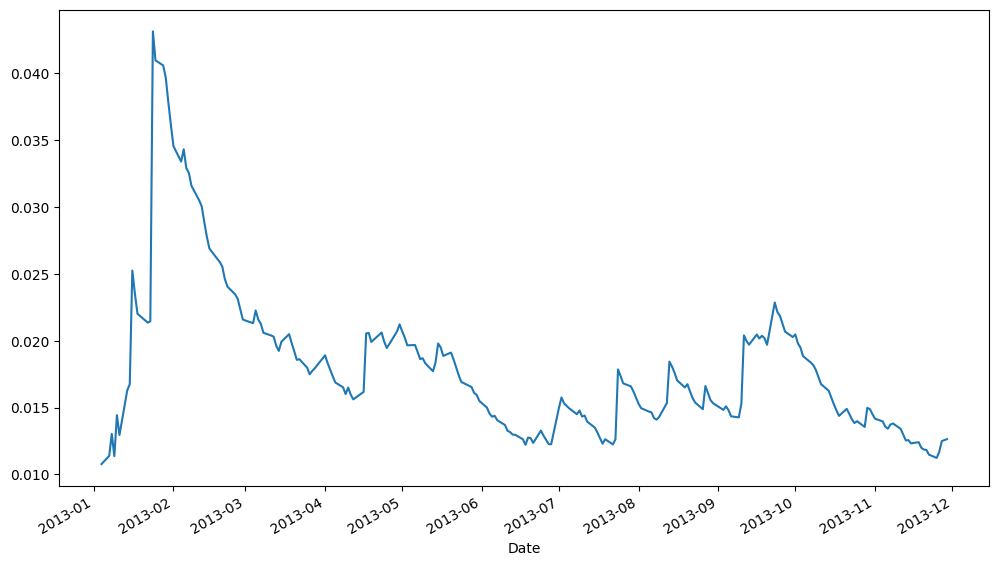

In [ ]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

# "Real World" Data

In [8]:
from io import BytesIO
import os
from urllib.parse import urlencode

import requests
import numpy as np
import pandas as pd


def read_avocadata(start_date, end_date, cache_loc='avocadata.html'):
    """Download avocado data to a dataframe.
    Parameters
    ----------
    """
    start_date = pd.Timestamp(start_date)
    end_date = pd.Timestamp(end_date)
    base_url = 'https://www.marketnews.usda.gov/mnp/fv-report-retail'
    query_params = {
        'class': ['FRUITS'],
        'commodity': ['AVOCADOS'],
        'compareLy': ['No'],
        'endDate': [end_date.strftime("%m/%d/%Y")],
        'format': ['excel'],
        'organic': ['ALL'],
        'portal': ['fv'],
        'region': ['ALL'],
        'repDate': [start_date.strftime("%m/%d/%Y")],
        'type': ['retail'],
    }

    url = base_url + '?' + urlencode(query_params, doseq=1)

    if not os.path.exists(cache_loc):
        resp = requests.get(url, stream=True)
        resp.raise_for_status()

        with open(cache_loc, 'wb') as f:
            for block in resp.iter_content(chunk_size=4096):
                f.write(block)
        f.close()

    with open(cache_loc, 'rb') as f:
        frame = pd.read_html(f, header=0)[0]

    # Cleanup
    frame = frame[frame['Unit'] == 'each']
    frame['Organic'] = (frame['Organic'] == 'Y')
    frame['Variety'].replace(
        {'VARIOUS GREENSKIN VARIETIES': 'GREENSKIN'},
        inplace=True,
    )
    frame['Date'] = pd.to_datetime(frame['Date'].values, utc=True)

    frame['Region'] = frame['Region'].str.replace(' U.S.', '')
    frame['Region'] = frame['Region'].str.replace(' ', '_')

    # Drop useless columns.
    return frame.drop(
        ['Class', 'Commodity', 'Environment', 'Unit', '% Marked Local'],
        axis=1,
    )


In [9]:
# from demos.avocados import read_avocadata

avocados = read_avocadata('2014', '2016')
avocados.head()

<ipython-input-8-74fdf899ad9d>:54: FutureWarning: The default value of regex will change from True to False in a future version.
  frame['Region'] = frame['Region'].str.replace(' U.S.', '')


,Date,Region,Variety,Organic,Number of Stores,Weighted Avg Price,Low Price,High Price
0,2014-01-03 00:00:00+00:00,NATIONAL,HASS,False,9184,0.93,NaN,NaN
1,2014-01-03 00:00:00+00:00,NATIONAL,HASS,True,872,1.44,NaN,NaN
2,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,False,1449,1.08,0.5,1.67
3,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,True,66,1.54,1.5,2.00
4,2014-01-03 00:00:00+00:00,SOUTHEAST,HASS,False,2286,0.98,0.5,1.99


**Our own example 34**

Consumimos el endpoint de la api de las bases de datos del gobierno para recuperar informacion, en este caso guardamos informacion de la base de datos de nacidos en el departamento de Casanare

In [3]:
import requests
import pandas as pd

response = requests.get('https://www.datos.gov.co/resource/3w74-b2fr.json?$query=SELECT%0A%20%20%60orden%60%2C%0A%20%20%60departamento_de_residencia%60%2C%0A%20%20%60nombre_ips_reps%60%2C%0A%20%20%60municpio_de_residencia%60%2C%0A%20%20%60tipo_de_id%60%2C%0A%20%20%60edad%60%2C%0A%20%20%60ciclo_de_vida%60%2C%0A%20%20%60sexo%60%2C%0A%20%20%60nacionalidad%60%2C%0A%20%20%60grupo_poblacional%60%2C%0A%20%20%60zona_de_ubicaci_n_de_la%60%2C%0A%20%20%60estado_actual_de_usuaria%60%2C%0A%20%20%60dx1%60%2C%0A%20%20%60gestacions%60%2C%0A%20%20%60partos%60%2C%0A%20%20%60cesareas%60%2C%0A%20%20%60abortos%60%2C%0A%20%20%60muertos%60%2C%0A%20%20%60vivos%60%2C%0A%20%20%60fecha_de_la_prueba_de_embarazo%60%2C%0A%20%20%60fecha_de_ingreso_al_control%60%2C%0A%20%20%60fum_d_a_mes_a_o%60%2C%0A%20%20%60edad_gestacional_a_corte%60%2C%0A%20%20%60fecha_probable_de_parto_por%60%2C%0A%20%20%60edad_gestacional_al_ingreso%60%2C%0A%20%20%60trimestre_de_ingreso_a_1%60%2C%0A%20%20%60captacion_temprana_si_no%60%2C%0A%20%20%60riesgo_obstetrico_al_ingreso%60%2C%0A%20%20%60peso_inicial_kg_antes_del%60%2C%0A%20%20%60talla_metros%60%2C%0A%20%20%60indice_de_masa_corporal_imc%60%2C%0A%20%20%60clasificaci_n_del_imc%60%2C%0A%20%20%60hipertension_arterial_si%60%2C%0A%20%20%60diabetes_si_no%60%2C%0A%20%20%60vih_si_no%60%2C%0A%20%20%60sifilis_si_no%60%2C%0A%20%20%60tuberculosis_si_no%60%2C%0A%20%20%60apoyo_familiar_si_no%60%2C%0A%20%20%60embarazo_deseado_si_no%60%2C%0A%20%20%60h_bitos_de_riesgo_fumar%60%2C%0A%20%20%60ha_sido_victima_de_violencia%60%2C%0A%20%20%60ha_sido_victima_de_abuso%60%2C%0A%20%20%60informaci_n_de_causales_para%60%2C%0A%20%20%60fecha_de_1_control_prenatal%60%2C%0A%20%20%60fecha_de_2_control_prenatal%60%2C%0A%20%20%60fecha_de_3_control_prenatal%60%2C%0A%20%20%60fecha_de_4_control_prenatal%60%2C%0A%20%20%60fecha_de_5_control_prenatal%60%2C%0A%20%20%60fecha_de_6_control_prenatal%60%2C%0A%20%20%60fecha_de_7_control_prenatal%60%2C%0A%20%20%60fecha_de_8_control_prenatal%60%2C%0A%20%20%60fecha_de_9_control_prenatal%60%2C%0A%20%20%60fecha_de_ultimo_control_d%60%2C%0A%20%20%60peso_en_el_ultimo_control%60%2C%0A%20%20%60riesgo_obstetrico_ultimo%60%2C%0A%20%20%60sistolica_ultimo_control%60%2C%0A%20%20%60diastolica_ultimo_control%60%2C%0A%20%20%60fecha_de_consulta_por%60%2C%0A%20%20%60fecha_de_1_consulta_de%60%2C%0A%20%20%60fecha_de_2_consulta_de%60%2C%0A%20%20%60fecha_de_consulta_de%60%2C%0A%20%20%60fecha_de_consulta_de_1%60%2C%0A%20%20%60ecografia_entre_las_semanas%60%2C%0A%20%20%60fecha_de_eco_de_detalle_semana%60%2C%0A%20%20%60fecha_eco_obstetrica_iii%60%2C%0A%20%20%60fecha_de_aplicaci_n_influenza%60%2C%0A%20%20%60fecha_de_aplicaci_n_tdap%60%2C%0A%20%20%60nombre_biologico_contra_covid%60%2C%0A%20%20%60fecha_1_dosis_covid_19%60%2C%0A%20%20%60fecha_2_dosis_covid_19%60%2C%0A%20%20%60fecha_3_dosis_covid_19%60%2C%0A%20%20%60fecha_toma_hemograma_a_o%60%2C%0A%20%20%60resultado_hemograma%60%2C%0A%20%20%60fecha_toma_urocultivo_a_o%60%2C%0A%20%20%60resultado_urocultivo_con%60%2C%0A%20%20%60fecha_toma_ultimo_urocultivo%60%2C%0A%20%20%60resultado_ltimo_urocultivo%60%2C%0A%20%20%60fecha_toma_1_vih_a_o_mes%60%2C%0A%20%20%60resultado_elisa_para_detecci%60%2C%0A%20%20%60fecha_toma_1_vdrl_a_o_mes%60%2C%0A%20%20%60resultado_1_vdrl%60%2C%0A%20%20%60fecha_toma_ig_g_rubeola_a%60%2C%0A%20%20%60resultado_ig_g_rubeola%60%2C%0A%20%20%60fecha_toma_ig_m_rubeola_a%60%2C%0A%20%20%60resultado_ig_m_rubeola%60%2C%0A%20%20%60fecha_ig_g_toxoplasma_gondi%60%2C%0A%20%20%60resultado_ig_g_toxoplasma%60%2C%0A%20%20%60fecha_ig_m_toxoplasma_gondi%60%2C%0A%20%20%60resultado_ig_m_toxoplasma%60%2C%0A%20%20%60fecha_toma_chagas_a_o_mes%60%2C%0A%20%20%60resultado_chagas%60%2C%0A%20%20%60fecha_toma_tsh_a_o_mes_d%60%2C%0A%20%20%60resultado_tsh%60%2C%0A%20%20%60fecha_toma_hemoclasificaci%60%2C%0A%20%20%60resultado_hemoclasificaci%60%2C%0A%20%20%60fecha_toma_glicemia_a_o_mes%60%2C%0A%20%20%60reporte_de_glicemia_a_o_mes%60%2C%0A%20%20%60fecha_toma_hepatitis_b_hbsag%60%2C%0A%20%20%60resultado_hepatitis_b_hbsag%60%2C%0A%20%20%60fecha_toma_de_parcial_de%60%2C%0A%20%20%60resultado_del_parcial_de%60%2C%0A%20%20%60fecha_toma_frotis_vaginal%60%2C%0A%20%20%60reporte_de_frotis_de_flujo%60%2C%0A%20%20%60fecha_toma_prueba_tolerancia%60%2C%0A%20%20%60reporte_de_prueba_de%60%2C%0A%20%20%60fecha_2_toma_de_vdrl_a_o%60%2C%0A%20%20%60resultado_vdrl%60%2C%0A%20%20%60fecha_de_consejer_a_para%60%2C%0A%20%20%60fecha_toma_2_vih_a_o_mes%60%2C%0A%20%20%60resultado_prueba_vih%60%2C%0A%20%20%60fecha_toma_cultivo_vaginal%60%2C%0A%20%20%60resusltado_cutlivo_vaginal%60%2C%0A%20%20%60fecha_toma_2_hemograma_a%60%2C%0A%20%20%60resultado_de_hemoglobina%60%2C%0A%20%20%60fecha_de_consejer_a_para_1%60%2C%0A%20%20%60fecha_toma_3_vih_dia_mes%60%2C%0A%20%20%60resultado_prueba_vih_1%60%2C%0A%20%20%60fecha_toma_de_3_vdrl_a_o%60%2C%0A%20%20%60resultado_3_vdrl%60%2C%0A%20%20%60plan_de_parto_via_de_parto%60%2C%0A%20%20%60fecha_de_asesoria_lactancia%60%2C%0A%20%20%60fecha_de_parto_dia_mes_a%60%2C%0A%20%20%60caracteristicas_del_parto%60%2C%0A%20%20%60ips_atencion_parto%60%2C%0A%20%20%60no_semanas_de_gestaci_n%60%2C%0A%20%20%60suministran_m_todo_de%60%2C%0A%20%20%60tipo_de_metodo%60%2C%0A%20%20%60tipo_id%60%2C%0A%20%20%60sexo_1%60%2C%0A%20%20%60peso_al_nacer_grs%60%2C%0A%20%20%60talla_cm%60%2C%0A%20%20%60toman_tsh_neonatal%60%2C%0A%20%20%60resultado_tsh_1%60%2C%0A%20%20%60fecha_vacunaci_n_con_bcg%60%2C%0A%20%20%60fecha_vacunaci_n_hepatitis%60')

data = response.json()

resultados = pd.DataFrame(data)


resultados.head()

,orden,departamento_de_residencia,nombre_ips_reps,municpio_de_residencia,tipo_de_id,edad,ciclo_de_vida,sexo,nacionalidad,grupo_poblacional,...,suministran_m_todo_de,tipo_de_metodo,tipo_id,sexo_1,peso_al_nacer_grs,talla_cm,toman_tsh_neonatal,resultado_tsh_1,fecha_vacunaci_n_con_bcg,fecha_vacunaci_n_hepatitis
0,4359,Casanare,EMPRESA SOCIAL DEL ESTADO SALUD YOPAL,YOPAL,CC,37,Adulto Maduro,FEMENINO,COLOMBIANA,OTRO,...,No registra,No registra,No registra,MASCULINO,3155,49,No registra,No registra,No registra,No registra
1,4358,Casanare,HOSPITAL DE AGUAZUL JUAN HERNANDO URREGO ESE,AGUAZUL,CC,35,Adulto Joven,FEMENINO,COLOMBIANA,OTRO,...,No registra,No registra,No registra,FEMENINO,3670,51,No registra,No registra,No registra,No registra
2,4357,Casanare,EMPRESA SOCIAL DEL ESTADO SALUD YOPAL,YOPAL,CC,33,Adulto Joven,FEMENINO,COLOMBIANA,OTRO,...,No registra,No registra,No registra,MASCULINO,3125,52,No registra,No registra,No registra,No registra
3,4356,Casanare,EMPRESA SOCIAL DEL ESTADO SALUD YOPAL,YOPAL,CC,26,Adulto Joven,FEMENINO,COLOMBIANA,OTRO,...,No registra,No registra,No registra,MASCULINO,3305,50,No registra,No registra,No registra,No registra
4,4355,Casanare,EMPRESA SOCIAL DEL ESTADO SALUD YOPAL,YOPAL,CC,19,Adulto Joven,FEMENINO,COLOMBIANA,OTRO,...,No registra,No registra,No registra,FEMENINO,3170,50,No registra,No registra,No registra,No registra


**Our own example 35**

Filtramos y mostramos unicamente los resultado de los residentes en yopal

In [4]:
# We filter to show only results from patients residing in Yopal
resultados_yopal = resultados.loc[resultados['municpio_de_residencia'] == 'YOPAL']
resultados_yopal

,orden,departamento_de_residencia,nombre_ips_reps,municpio_de_residencia,tipo_de_id,edad,ciclo_de_vida,sexo,nacionalidad,grupo_poblacional,...,suministran_m_todo_de,tipo_de_metodo,tipo_id,sexo_1,peso_al_nacer_grs,talla_cm,toman_tsh_neonatal,resultado_tsh_1,fecha_vacunaci_n_con_bcg,fecha_vacunaci_n_hepatitis
0,4359,Casanare,EMPRESA SOCIAL DEL ESTADO SALUD YOPAL,YOPAL,CC,37,Adulto Maduro,FEMENINO,COLOMBIANA,OTRO,...,No registra,No registra,No registra,MASCULINO,3155,49,No registra,No registra,No registra,No registra
2,4357,Casanare,EMPRESA SOCIAL DEL ESTADO SALUD YOPAL,YOPAL,CC,33,Adulto Joven,FEMENINO,COLOMBIANA,OTRO,...,No registra,No registra,No registra,MASCULINO,3125,52,No registra,No registra,No registra,No registra
3,4356,Casanare,EMPRESA SOCIAL DEL ESTADO SALUD YOPAL,YOPAL,CC,26,Adulto Joven,FEMENINO,COLOMBIANA,OTRO,...,No registra,No registra,No registra,MASCULINO,3305,50,No registra,No registra,No registra,No registra
4,4355,Casanare,EMPRESA SOCIAL DEL ESTADO SALUD YOPAL,YOPAL,CC,19,Adulto Joven,FEMENINO,COLOMBIANA,OTRO,...,No registra,No registra,No registra,FEMENINO,3170,50,No registra,No registra,No registra,No registra
5,4354,Casanare,EMPRESA SOCIAL DEL ESTADO SALUD YOPAL,YOPAL,CC,42,Adulto Maduro,FEMENINO,COLOMBIANA,OTRO,...,No registra,No registra,No registra,FEMENINO,2595,47,No registra,No registra,No registra,No registra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,4160,Casanare,EMPRESA SOCIAL DEL ESTADO SALUD YOPAL,YOPAL,CC,19,Adulto Joven,FEMENINO,COLOMBIANA,OTROS,...,No registra,No registra,No registra,FEMENINO,3170,50,No registra,No registra,No registra,No registra
201,4158,Casanare,EMPRESA SOCIAL DEL ESTADO SALUD YOPAL,YOPAL,CC,29,Adulto Joven,FEMENINO,COLOMBIANA,OTROS,...,No registra,No registra,No registra,FEMENINO,3500,51,No registra,No registra,No registra,No registra
202,4157,Casanare,EMPRESA SOCIAL DEL ESTADO SALUD YOPAL,YOPAL,CC,23,Adulto Joven,FEMENINO,COLOMBIANA,OTROS,...,No registra,No registra,No registra,FEMENINO,3555,53,No registra,No registra,No registra,No registra
204,4155,Casanare,EMPRESA SOCIAL DEL ESTADO SALUD YOPAL,YOPAL,CC,26,Adulto Joven,FEMENINO,COLOMBIANA,OTROS,...,No registra,No registra,No registra,FEMENINO,3230,51,No registra,No registra,No registra,No registra


**Our own example 36**

In [5]:
# We show the types of Data of our DataFrame
pacientes_por_municipio = resultados.groupby('municpio_de_residencia')['orden'].count()
print(pacientes_por_municipio)

municpio_de_residencia
AGUAZUL            12
HATO COROZAL        2
NUESTRA IPS         1
OROCUE              1
PAZ DE ARIPORO      2
Sin Datos         849
TAURAMENA          12
TRINIDAD            3
YOPAL             118
Name: orden, dtype: int64


In [10]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

Date                  datetime64[ns, UTC]
Region                             object
Variety                            object
Organic                              bool
Number of Stores                    int64
Weighted Avg Price                float64
Low Price                         float64
High Price                        float64
dtype: object

**Our own example 37**

In [7]:
resultados.dtypes

orden                         object
departamento_de_residencia    object
nombre_ips_reps               object
municpio_de_residencia        object
tipo_de_id                    object
                               ...  
talla_cm                      object
toman_tsh_neonatal            object
resultado_tsh_1               object
fecha_vacunaci_n_con_bcg      object
fecha_vacunaci_n_hepatitis    object
Length: 135, dtype: object

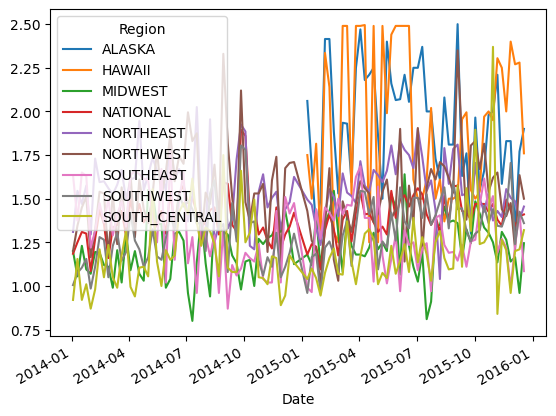

In [11]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

**Our own example 38**

Graficamos la cantidad de pacientes agrupandolos por municipio de residencia

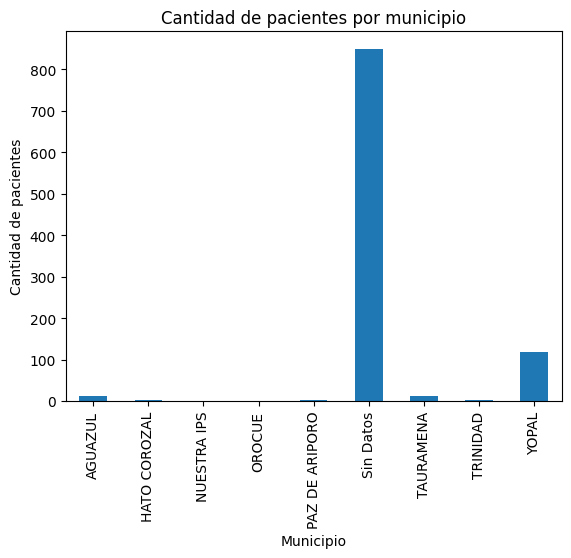

In [13]:
import matplotlib.pyplot as plt
pacientes_por_municipio = resultados.groupby('municpio_de_residencia')['orden'].count()
pacientes_por_municipio.plot(kind='bar')
plt.title('Cantidad de pacientes por municipio')
plt.xlabel('Municipio')
plt.ylabel('Cantidad de pacientes')
plt.show()

In [14]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)

    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

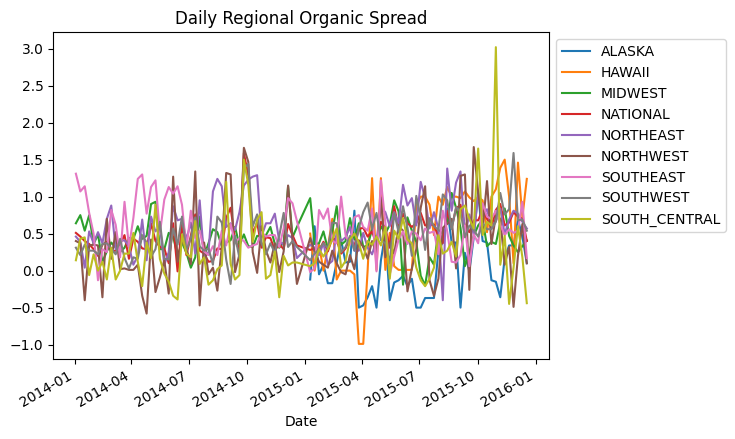

In [15]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

**Our own example 39**

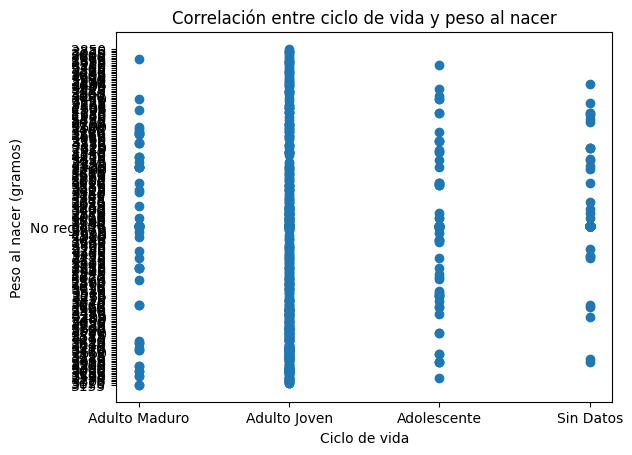

In [16]:
plt.scatter(resultados['ciclo_de_vida'], resultados['peso_al_nacer_grs'])
plt.xlabel('Ciclo de vida')
plt.ylabel('Peso al nacer (gramos)')
plt.title('Correlación entre ciclo de vida y peso al nacer')
plt.show()

In [17]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

Region,ALASKA,HAWAII,MIDWEST,NATIONAL,NORTHEAST,NORTHWEST,SOUTHEAST,SOUTHWEST,SOUTH_CENTRAL
Region,,,,,,,,,
ALASKA,1.000000,0.202723,0.175251,0.007844,0.051049,0.087575,0.129079,-0.070868,0.161624
HAWAII,0.202723,1.000000,-0.021116,0.373914,0.247171,0.341155,0.019388,0.159192,0.092632
MIDWEST,0.175251,-0.021116,1.000000,0.062595,-0.010213,-0.043783,0.047437,-0.059128,0.068902
NATIONAL,0.007844,0.373914,0.062595,1.000000,0.502035,0.579102,-0.040539,0.635006,0.486524
NORTHEAST,0.051049,0.247171,-0.010213,0.502035,1.000000,0.242039,-0.236225,0.360389,0.149881
NORTHWEST,0.087575,0.341155,-0.043783,0.579102,0.242039,1.000000,-0.032306,0.165992,0.349935
SOUTHEAST,0.129079,0.019388,0.047437,-0.040539,-0.236225,-0.032306,1.000000,-0.167631,-0.021176
SOUTHWEST,-0.070868,0.159192,-0.059128,0.635006,0.360389,0.165992,-0.167631,1.000000,0.254504
SOUTH_CENTRAL,0.161624,0.092632,0.068902,0.486524,0.149881,0.349935,-0.021176,0.254504,1.000000


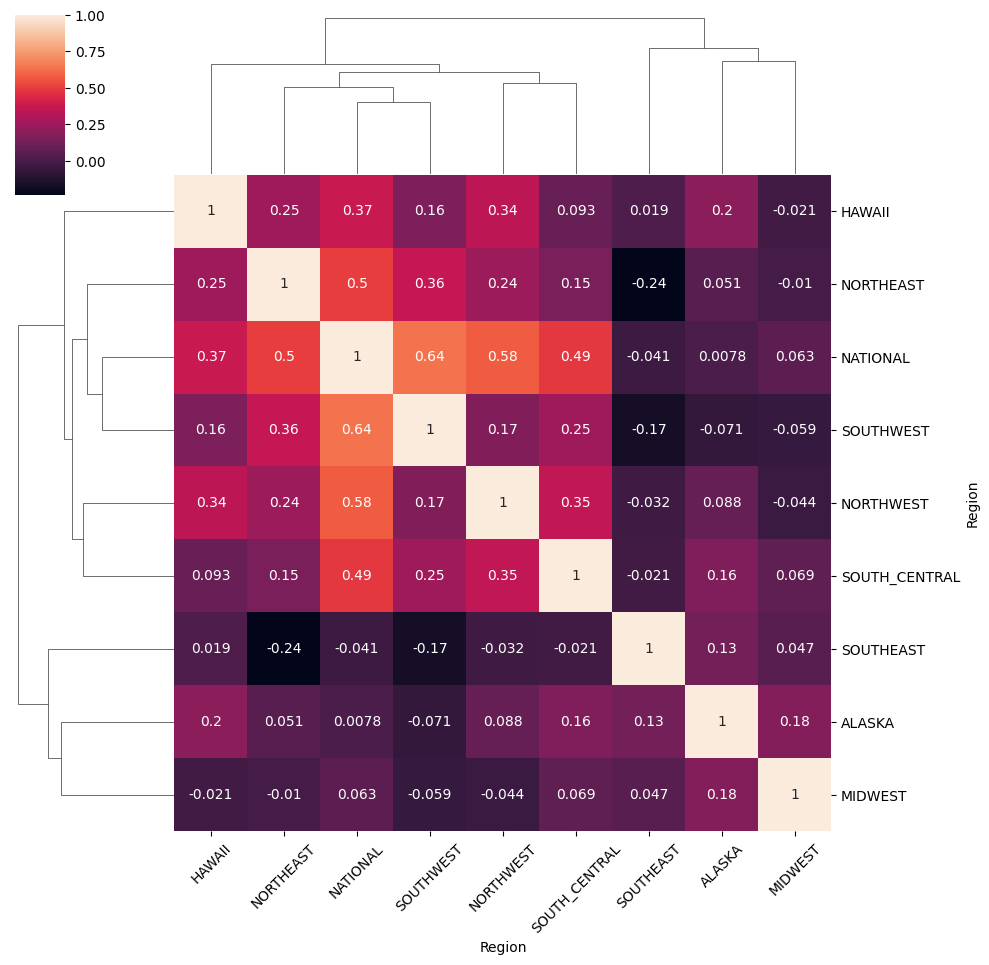

In [ ]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

**Our own example 40**

Graficamos el promedio de edad de las madres por municipio

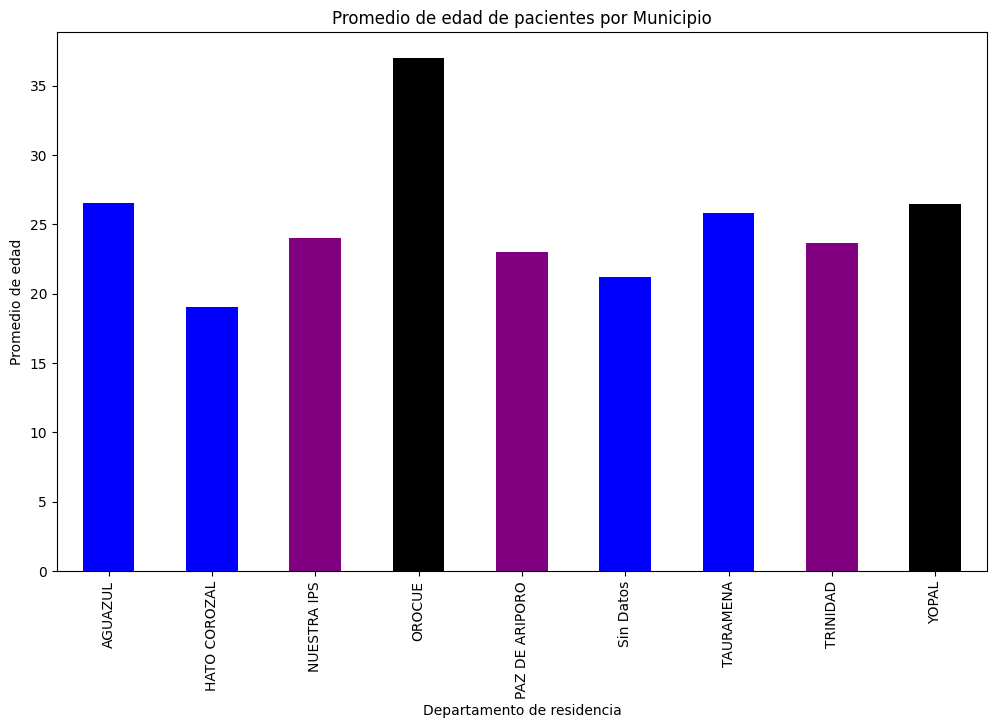

In [ ]:
to_int = lambda x: int(x) if str(x).isdigit() else 0
resultados['edad'] = resultados['edad'].apply(to_int)
departamento_edad = resultados.groupby('municpio_de_residencia')['edad'].mean()
colors = ['blue','blue', 'purple', 'black', "purple"]
fig, ax = plt.subplots()
departamento_edad.plot(kind='bar', ax=ax, color=colors)
ax.set_title('Promedio de edad de pacientes por Municipio')
ax.set_xlabel('Departamento de residencia')
ax.set_ylabel('Promedio de edad')
plt.show()

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Thanks!

#Datos Colombia
Cargar el dataset de datos colombia sobre los beneficiarios de familias en accioón desde aca: https://www.datos.gov.co/Inclusi-n-Social-y-Reconciliaci-n/FAMILIAS-FOCALIZADAS-PRIMERA-FASE-DEL-PROGRAMA-DE-/xswh-ityu/about_data



In [ ]:
from urllib.parse import urlencode
import pandas as pd
import requests
import matplotlib.pyplot as plt
import matplotlib.cm as cm

data = requests.get("https://www.datos.gov.co/resource/xswh-ityu.json")
dfFamilias = pd.DataFrame(data.json())
dfFamilias.head()

,bancarizado,codigodepartamentoatencion,codigomunicipioatencion,discapacidad,estadobeneficiario,etnia,fechainscripcionbeneficiario,genero,nivelescolaridad,nombredepartamentoatencion,...,tipoasignacionbeneficio,tipobeneficio,tipodocumento,tipopoblacion,rangobeneficioconsolidadoasignado,rangoultimobeneficioasignado,fechaultimobeneficioasignado,rangoedad,titular,cantidaddebeneficiarios
0,NO,15,15572,SI,ACTIVO,ND,2012-12-01,Mujer,ND,BOYACA,...,ND,ND,TI,DESPLAZADOS,0 - 1.500.000,0 - 1.300.000,1900-01-01,06-17,NO,1
1,NO,15,15572,NO,ACTIVO,ND,2013-08-01,Mujer,PRIMARIA,BOYACA,...,ND,EDUCACIÓN PRIMARIA,TI,DESPLAZADOS,0 - 1.500.000,0 - 1.300.000,1900-01-01,06-17,NO,3
2,ND,15,15572,NO,ACTIVO,ND,2015-09-01,Mujer,ND,BOYACA,...,MONETARIO,NUTRICIÓN,No Definido,DESPLAZADOS,3.000.001 - 4.500.000,0 - 1.300.000,2018-01-01,30-49,SI,1
3,SI,15,15572,NO,ACTIVO,ND,2012-12-01,Mujer,ND,BOYACA,...,MONETARIO,ND,CC,UNIDOS,0 - 1.500.000,0 - 1.300.000,2018-01-01,>65,SI,1
4,SI,15,15572,NO,ACTIVO,ND,2012-12-01,Mujer,ND,BOYACA,...,MONETARIO,ND,CC,UNIDOS,0 - 1.500.000,0 - 1.300.000,2018-01-01,>65,SI,1


(array([0, 1]), [Text(0, 0, 'Mujer'), Text(1, 0, 'Hombre')])

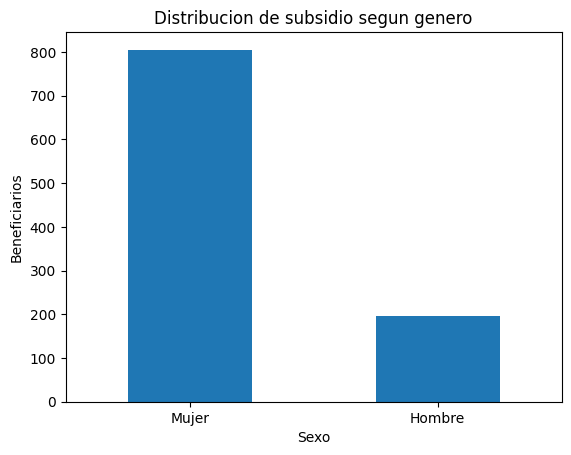

In [ ]:
genero = dfFamilias.genero.value_counts()
genero.plot(kind='bar', stacked=True)
plt.title("Distribucion de subsidio segun genero")
plt.ylabel("Beneficiarios")
plt.xlabel('Sexo')
plt.xticks(rotation=0)

##Se observa que hay una clara diferencia entre los beneficiados de sexo masculino y el sexo femenido

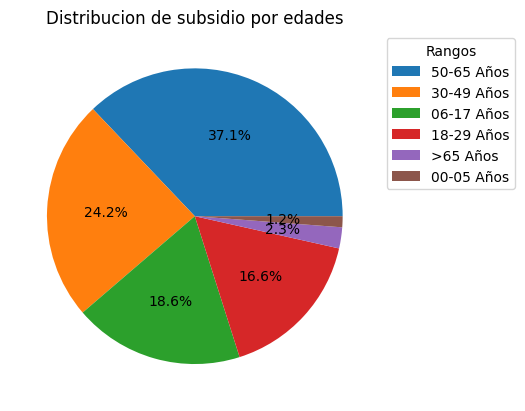

In [ ]:
import matplotlib.pyplot as plt


# Contar los valores de edades
edades = dfFamilias['rangoedad'].value_counts()

# Graficar
edades.plot(kind='pie', autopct='%1.1f%%', stacked=True, labels=None)  # Pasar labels=None
plt.title("Distribucion de subsidio por edades")
plt.ylabel("")

# Ajustar los rangos de edad para que incluyan "Años"
#dfFamilias['rangoedad'] = dfFamilias['rangoedad'] + " Años"

# Colocar la leyenda en la parte superior izquierda
plt.legend(title='Rangos', loc='upper left', labels=edades.index , bbox_to_anchor=(1, 1))

plt.xticks(rotation=0)
plt.show()


##El foco de beneficiarios esta al rededor del rango de 50-65 años


<Figure size 1000x600 with 0 Axes>

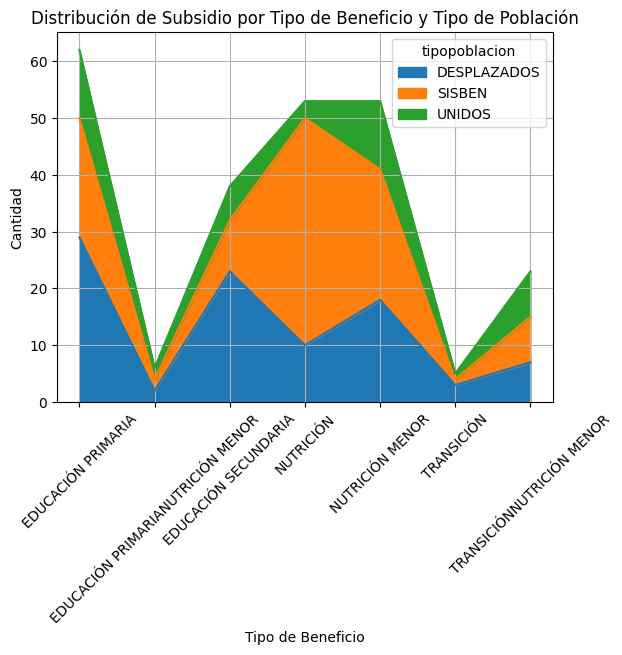

In [ ]:
# Crear el gráfico de área
# Supongamos que tienes un DataFrame llamado dfFamilias con las columnas 'tipobeneficio' y 'tipopoblacion'

# Filtrar los datos
df_filt = dfFamilias[(dfFamilias['tipopoblacion'] != 'ND') & (dfFamilias['tipobeneficio'] != 'ND')]

# Contar los valores para cada combinación de tipo de beneficio y tipo de población
distribucion = df_filt.groupby(['tipobeneficio', 'tipopoblacion']).size().unstack().fillna(0)

# Crear el gráfico de área
plt.figure(figsize=(10, 6))
distribucion.plot(kind='area', stacked=True)
plt.title("Distribución de Subsidio por Tipo de Beneficio y Tipo de Población")
plt.xlabel('Tipo de Beneficio')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()